## Libraries

In [1]:
import numpy as np
from pylab import *
from matplotlib import patches
from matplotlib.pyplot import axvline, axhline
import matplotlib.pyplot as plt

from scipy.fftpack import fft,fftshift
import scipy.signal as signal
from tool._fixedInt import *

## Create a signal for demonstration.

320 samples of (1000Hz + 15000 Hz) at 48 kHz

In [2]:

sample_rate = 48000.
nsamples = 320

F_1KHz = 1000.
A_1KHz = 1.0
 
F_15KHz = 15000.
A_15KHz = 0.5
 
t = np.arange(nsamples) / sample_rate

noise  = A_15KHz * np.sin(2*np.pi*F_15KHz*t)
data = A_1KHz  * np.sin(2*np.pi*F_1KHz*t)
signal_gen = data + noise
 
    
# FFT
NFFT = 1024
fs = sample_rate

fft_signal     = fft(data,NFFT)
fft_signal_gen = fft(signal_gen,NFFT)
xfft           = np.linspace(0.0, 1.0/(2.0*t[1]), NFFT//2)

## Plot signals

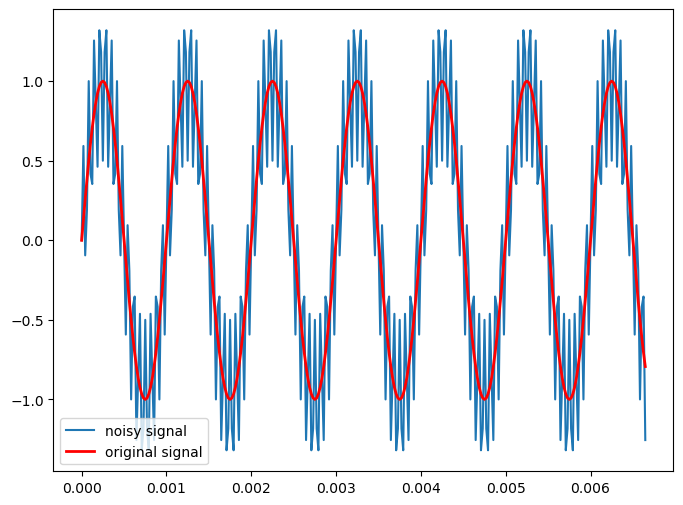

In [3]:
figure(1, figsize=(8, 6))

# Plot the noisy signal and original signal
plot(t, signal_gen, label='noisy signal')
plot(t, data, 'r-', linewidth=2, label='original signal') 
legend()

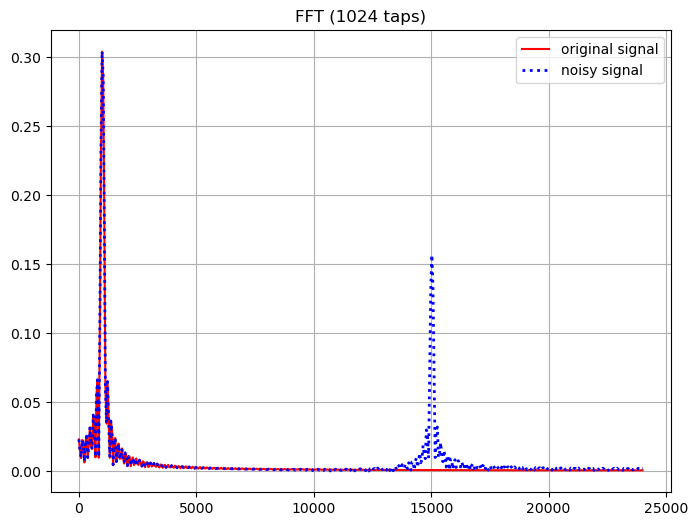

In [4]:
#------------------------------------------------
# Plot FFT signals
#------------------------------------------------

figure(1, figsize=(8, 6))
title('FFT (%d taps)' % NFFT)
plot(xfft,2.0/NFFT * np.abs(fft_signal[0:NFFT//2]),'r-', label='original signal')
plot(xfft,2.0/NFFT * np.abs(fft_signal_gen[0:NFFT//2]),'b:' ,linewidth=2, label='noisy signal')
legend()
grid(True)
show()

## Create a IIR filter and apply it to signal.

In [5]:
wp = 0.2
ws = 0.3
gpass = 1
gstop = 40

b,a = signal.iirdesign(wp, ws, gpass, gstop)
print ((b))
# Get the poles and zeros
z, p, k = signal.tf2zpk(b,a)

# Use lfilter to filter the signal with the IIR filter
filtered_signal = signal.lfilter(b, a, signal_gen)

# FFT
fft_filtered_signal = fft(filtered_signal,NFFT)

# Frequency response
w, h = signal.freqz(b, a)


[ 0.01967436 -0.01713698  0.0332899  -0.01713698  0.01967436]


## Plot the IIR Coefficients

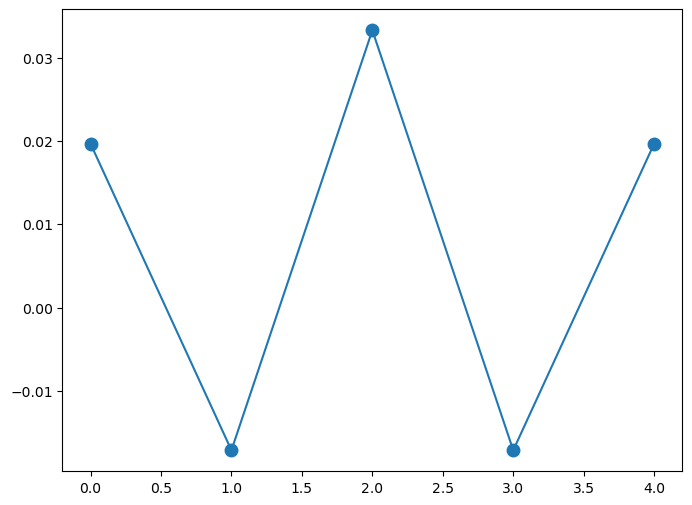

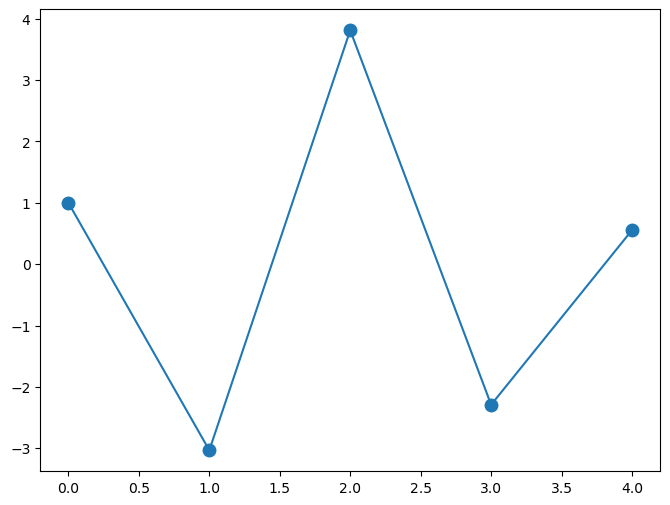

In [6]:
# Plot the b
plt.figure(1, figsize=(8, 6))
plt.plot(b,'o-', markersize=9,)
plt.show()

# Plot the a
plt.figure(1, figsize=(8, 6))
plt.plot(a,'o-', markersize=9,)
plt.show()

## Plot the IIR zeros and poles

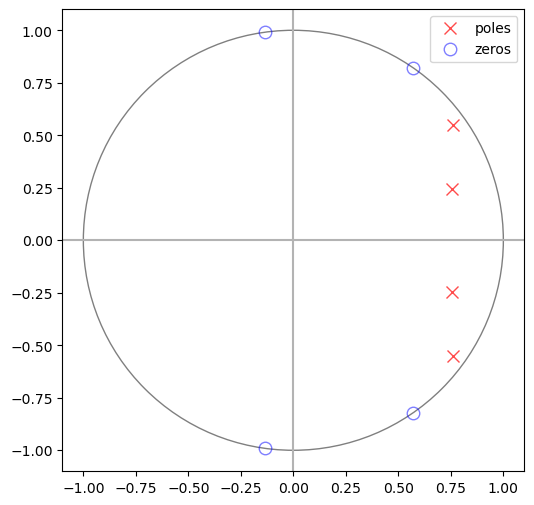

In [7]:
plt.figure(1, figsize=(8, 6))

ax = plt.subplot(111)

# Add unit circle and zero axes
unit_circle = patches.Circle((0,0), radius=1, fill=False,color='black', ls='solid', alpha=0.5)
ax.add_patch(unit_circle)

axvline(0, color='0.7')
axhline(0, color='0.7')

# Plot the poles
poles = plt.plot(p.real, p.imag,
                 'x', markersize=9,
                 alpha=0.7,markeredgecolor='red',label='poles')

# Plot the zeros
zeros = plt.plot(z.real, z.imag,
                 'o', markersize=9,color='none', 
             alpha=0.5,markeredgecolor='blue',label='zeros')

# Scale axes to fit
r = 1.1 * np.amax(np.concatenate((abs(z), abs(p), [1])))
plt.axis('scaled')
plt.axis([-r, r, -r, r])

plt.legend()
plt.show()

## Plot the Frequency and Phase Response

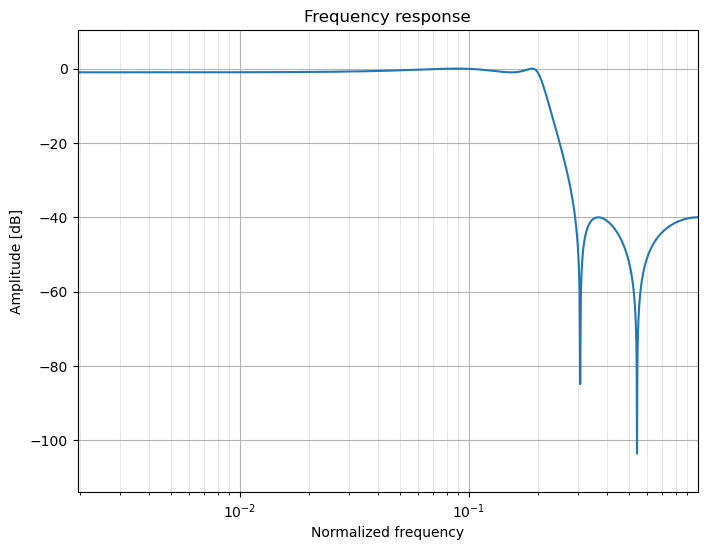

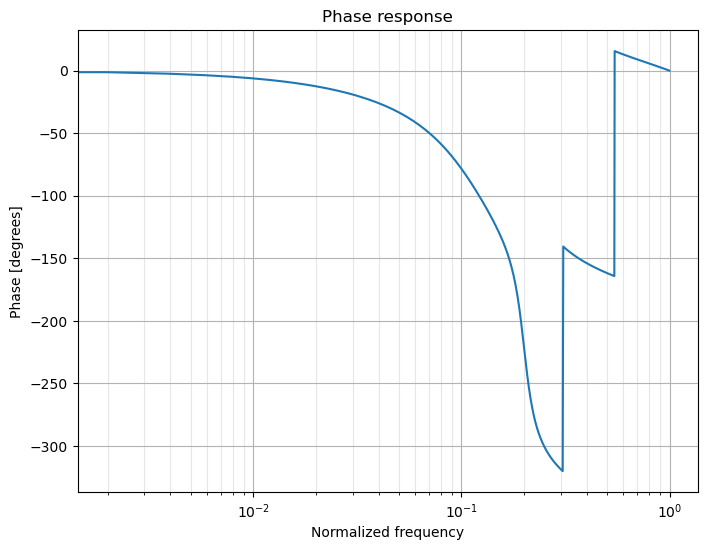

In [8]:
plt.figure(1, figsize=(8, 6))

plt.title('Frequency response')
plt.xlabel('Normalized frequency')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(True, color = '0.7', linestyle='-', which='major', axis='both')
plt.grid(True, color = '0.9', linestyle='-', which='minor', axis='both')
plt.plot(w/pi, 20*log10(abs(h)))
plt.xscale('log')
plt.show()

plt.figure(1, figsize=(8, 6))
plt.title('Phase response')
plt.xlabel('Normalized frequency')
plt.ylabel('Phase [degrees]')
plt.grid(True, color = '0.7', linestyle='-', which='major')
plt.grid(True, color = '0.9', linestyle='-', which='minor')
plt.plot(w/pi, 180/pi * unwrap(angle(h)))
plt.xscale('log')
show()

## Plot the original and filtered signals.

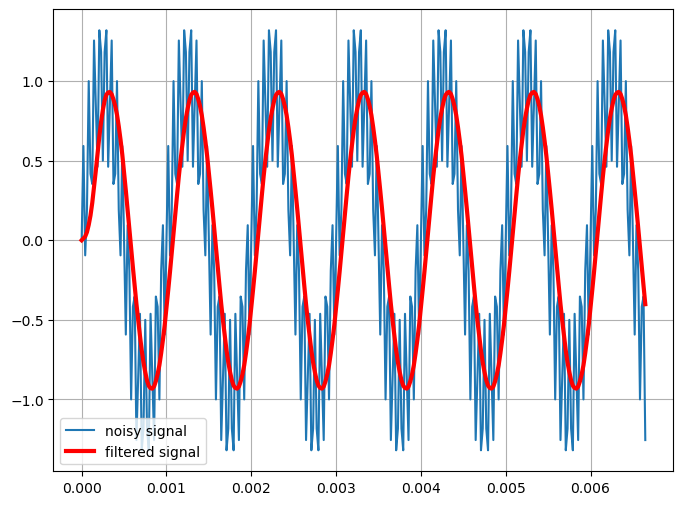

In [9]:
# The first N-1 samples are "corrupted" by the initial conditions
#warmup = numtaps - 1
 
# The phase delay of the filtered signal
#delay = (warmup / 2) / sample_rate
 
figure(1, figsize=(8, 6))
# Plot the original signal
plot(t, signal_gen, label='noisy signal')
# Plot the filtered signal, shifted to compensate for the phase delay
plot(t, filtered_signal, 'r-', linewidth=3 , label='filtered signal')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
#plot(t[warmup:]-delay, filtered_signal[warmup:], 'y', label='filtered signal compensated')
legend()
grid(True)
show()

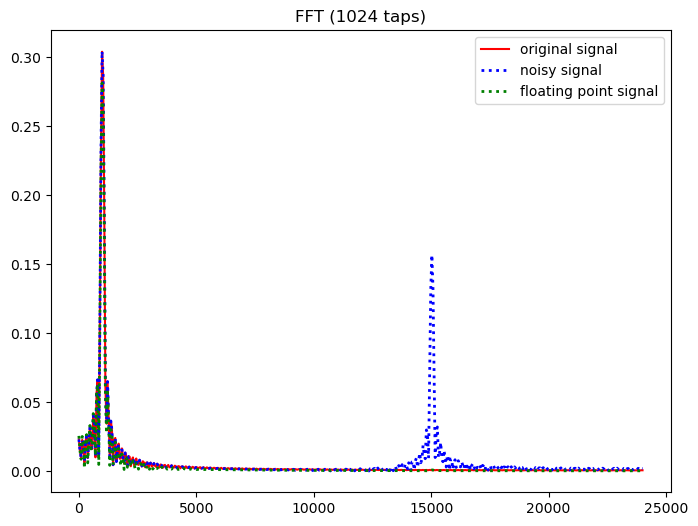

In [10]:
#------------------------------------------------
# Plot FFT the original and filtered signals.
#------------------------------------------------

figure(2, figsize=(8, 6))
title('FFT (%d taps)' % NFFT)
plot(xfft,2.0/NFFT * np.abs(fft_signal[0:NFFT//2]),'r-', label='original signal')
plot(xfft,2.0/NFFT * np.abs(fft_signal_gen[0:NFFT//2]),'b:' ,linewidth=2, label='noisy signal')
plot(xfft,2.0/NFFT * np.abs(fft_filtered_signal[0:NFFT//2]),'g:' ,linewidth=2, label='floating point signal')

legend()

show()